In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

#### Data Loading and Filtering

In [2]:
df = pd.read_csv("../zuu crew scores.csv")
df = df[df['CourseName'] == 'Foundations of ML']
df["Passed"] = df["CapstoneScore"] > 50
del df['MemberName'], df['CourseName'], df['CapstoneScore']
df.head()

,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,Passed
0,3,79.9,43.7,2,0,62.8,5.0,False
1,2,76.8,95.6,6,0,87.4,2.7,True
2,3,96.6,75.9,8,0,98.4,2.8,True
4,2,83.2,24.0,6,0,41.8,4.2,False
7,3,86.5,88.0,5,0,23.9,1.3,True


In [3]:
Y = df['Passed'].values
X_df = df.drop(columns=['Passed'])

# Calculate mean and std for each feature (column)
mean = X_df.mean()
std = X_df.std()

# Standardize each column
X_standardized = (X_df - mean) / std

# Convert to numpy array
X_df = X_standardized.values

In [4]:
X = X_df
X = np.column_stack((
    np.ones(len(df)),
    X
))

In [5]:
# defining sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### Cost Function

In [6]:
def compute_cost(y_hat, Y):
    pos_component = np.sum(Y * np.log(y_hat))
    neg_component = np.sum((1 - Y) * np.log(1 - y_hat))

    m = len(Y)
    return (-1/m) * (pos_component + neg_component)

#### Optimization

In [7]:
def compute_gradients(X, Y, y_hat):
    m = len(Y)

    """
    beta0, beta1    
    """

    beta = (1 / m) * X.T.dot(y_hat - Y)

    return beta

In [8]:
beta = np.random.randn(8)
print(f"beta values : {beta}")

lr = 0.01
n_iter = 1000

beta values : [ 0.83514075  0.9560165  -1.1200459   0.19065952  1.62332239 -0.19192284
  0.93316693  0.04099443]


In [9]:
cost_history = []
for i in range(n_iter):
    """
    Z = beta.T.X = beta0 + beta1.x1
    Y_hat = sigmoid(Z)
    """
    z = X.dot(beta)
    y_hat = sigmoid(z)

    gradient = compute_gradients(X, Y, y_hat)

    beta = beta - lr * gradient

    cost = compute_cost(y_hat, Y)
    cost_history.append(cost)

    if i % 100 == 0:
        print(f"Iteration : {i}: Beta : {beta} :Cost : {cost:.4f}")

Iteration : 0: Beta : [ 0.83486667  0.9545466  -1.1180048   0.1939635   1.62174891 -0.19237997
  0.93255786  0.04134755] :Cost : 1.0202
Iteration : 100: Beta : [ 0.8075121   0.81381309 -0.92216705  0.50372471  1.46529301 -0.23258569
  0.87368803  0.07560377] :Cost : 0.8342
Iteration : 200: Beta : [ 0.78126711  0.68680654 -0.74398838  0.77246492  1.31371158 -0.26304098
  0.82060237  0.10559887] :Cost : 0.6853
Iteration : 300: Beta : [ 0.75711852  0.57500997 -0.58504943  1.00209229  1.1712266  -0.28602886
  0.7743676   0.1289836 ] :Cost : 0.5703
Iteration : 400: Beta : [ 0.73526393  0.47902918 -0.44600287  1.19682895  1.04084445 -0.30414848
  0.73470152  0.14492574] :Cost : 0.4838
Iteration : 500: Beta : [ 0.71574379  0.3981501  -0.32610144  1.36220892  0.92377744 -0.31930006
  0.70083944  0.15397901] :Cost : 0.4197
Iteration : 600: Beta : [ 0.69889233  0.33046438 -0.22336223  1.5040369   0.81956263 -0.33229019
  0.67199891  0.15750899] :Cost : 0.3721
Iteration : 700: Beta : [ 0.68513917

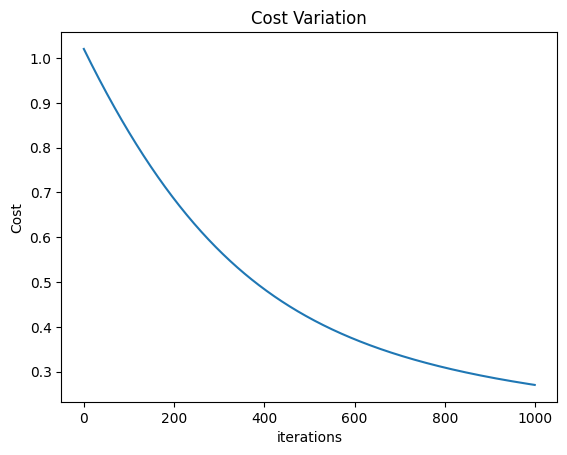

In [10]:
plt.plot(cost_history)
plt.title("Cost Variation")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()

#### Evaluation Matrics

In [11]:
# finding probabilty
z = X.dot(beta)
Y_proba = sigmoid(z)
Y_proba

array([0.47035523, 0.98800652, 0.9801352 , 0.18965629, 0.92391293,
       0.93782159, 0.29148038, 0.4066579 , 0.63945747, 0.12653477,
       0.89142374, 0.16353223, 0.04331981, 0.77510232, 0.66685034,
       0.13250622, 0.91691567, 0.04033993, 0.53477622, 0.99049581,
       0.94686711, 0.13052081, 0.13201406, 0.97899005, 0.94759952,
       0.03664449, 0.24527223, 0.39152149, 0.763932  , 0.55950752,
       0.95183745, 0.49974329, 0.13164818, 0.63021352, 0.91240108,
       0.85614308, 0.08025463, 0.17464489, 0.14835955, 0.87378529,
       0.94498898, 0.97957793, 0.65746533, 0.95920049, 0.61798609,
       0.75892008, 0.32999447, 0.0693964 , 0.90643937, 0.29418672,
       0.98542302, 0.06715102, 0.52321967, 0.97155079, 0.68173463,
       0.88342859, 0.86956161, 0.84800216, 0.92454647, 0.964941  ,
       0.01270537, 0.52403676, 0.56266308, 0.99181338, 0.07934966,
       0.84402052, 0.94891418, 0.56172112, 0.99110744, 0.1986189 ,
       0.11488284, 0.61963343])

In [12]:
def compute_confusion_matrix(Y,Y_hat):
    TP = np.sum((Y == 1) & (Y_hat == 1))
    FP = np.sum((Y == 0) & (Y_hat == 1))
    TN = np.sum((Y == 0) & (Y_hat == 0))
    FN = np.sum((Y == 1) & (Y_hat == 0))
    return np.array([
                [TN,FP]
                ,[FN,TP]
                ],
                dtype=int
                )

In [13]:
z = X.dot(beta)
Y_hat = sigmoid(z) > 0.5
Y_hat

array([False,  True,  True, False,  True,  True, False, False,  True,
       False,  True, False, False,  True,  True, False,  True, False,
        True,  True,  True, False, False,  True,  True, False, False,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True, False, False,  True])

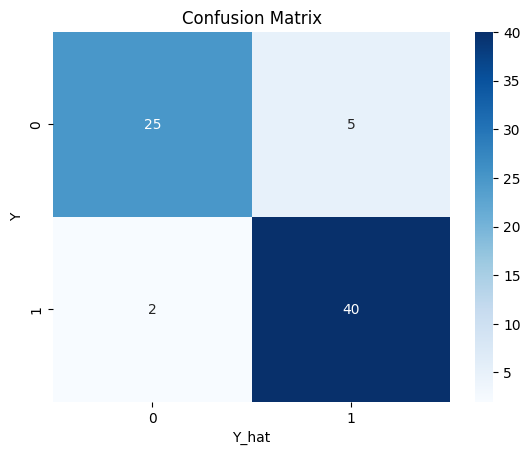

In [14]:
cm = compute_confusion_matrix(Y,Y_hat)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Y_hat')
plt.ylabel('Y')
plt.title('Confusion Matrix')
plt.show()

In [15]:
def precision_score(cm):
    TP = cm[1,1]
    FP = cm[0,1]
    return TP/(TP+FP)

def recall_score(cm):
    TP = cm[1,1]
    FN = cm[1,0]
    return TP / (TP +FN)

def f1_score(cm):
    p = precision_score(cm)
    r = recall_score(cm)
    return 2 * p * r / (p + r)

def accuracy(cm):
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    TN = cm[0,0]
    return (TP + TN) / (TP + TN + FP + FN)

In [16]:
cm = compute_confusion_matrix(Y, Y_hat) 
p = precision_score(cm)
r = recall_score(cm) 
f1 = f1_score(cm)
acc = accuracy(cm)

print(f"Precision : {p}")
print(f"Recall : {r}")
print(f"F1 Score : {f1}")
print(f"Accuracy : {acc}")

Precision : 0.8888888888888888
Recall : 0.9523809523809523
F1 Score : 0.9195402298850575
Accuracy : 0.9027777777777778


In [17]:
def roc_curve(Y,Y_proba):
    thresholds = np.linspace(1,0,200)

    tpr_list = []
    fpr_list = []

    for t in thresholds:
        y_hat = (Y_proba >= t).astype(int)
        
        TP = np.sum((Y == 1) & (y_hat == 1))
        FP = np.sum((Y == 0) & (y_hat == 1))
        TN = np.sum((Y == 0) & (y_hat == 0))
        FN = np.sum((Y == 1) & (y_hat == 0))

        tpr = TP / (TP + FN)
        fpr = FP / (FP + TN)
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return np.array(tpr_list), np.array(fpr_list), np.array(thresholds)



In [18]:
tpr, fpr, _ = roc_curve(Y, Y_proba)

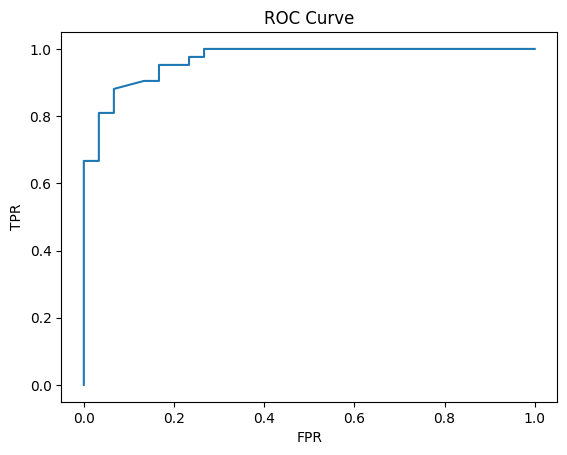

In [19]:
plt.plot(fpr, tpr, label='LogReg')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

In [20]:
auc = np.trapezoid(tpr, fpr)
print(f"AUC: {auc}")

AUC: 0.9682539682539684


#### Comapring with Sklearn

In [21]:
logr = LogisticRegression(max_iter=1000)
logr.fit(X_df,Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [22]:
Y_hat = logr.predict(X_df)
Y_hat

array([ True,  True,  True, False,  True,  True, False,  True, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
        True, False, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False,  True,  True,  True,  True, False, False,  True])

In [23]:
Y_proba = logr.predict_proba(X_df)
Y_proba = Y_proba[:,1]
Y_proba

array([0.50384982, 0.99762595, 0.98734248, 0.07951925, 0.98972957,
       0.99280403, 0.3202909 , 0.82423391, 0.25603656, 0.20121775,
       0.90809108, 0.0917792 , 0.07757741, 0.7614875 , 0.79392758,
       0.02059986, 0.99864118, 0.04281834, 0.32204056, 0.99699761,
       0.86126897, 0.08688325, 0.05038017, 0.99632933, 0.99585951,
       0.09141957, 0.13457323, 0.10688345, 0.64720946, 0.12020086,
       0.99793534, 0.25651591, 0.02165964, 0.94888962, 0.97352531,
       0.90230445, 0.02708323, 0.15825908, 0.13410639, 0.96552526,
       0.93212438, 0.95448043, 0.8406039 , 0.98763089, 0.44458694,
       0.75783356, 0.4754949 , 0.07993205, 0.92642731, 0.08973314,
       0.9646933 , 0.08961897, 0.7129916 , 0.99767325, 0.96406321,
       0.99505528, 0.9481983 , 0.91595395, 0.95459867, 0.98725066,
       0.00567935, 0.46804703, 0.40284303, 0.99473923, 0.12805777,
       0.7521613 , 0.97768752, 0.74711399, 0.99531018, 0.08879487,
       0.02358394, 0.75324292])